In [7]:
import numpy as np

In [8]:
import sympy as sp

In [349]:
m = np.array([1,1,1,2,1,1,1,1,1,1,1])
l = np.array([9.97,5.41,4.34,0.76,8.11,1.14,5.76,0.48,0.98,1.57,2.01])
#l = l*10**6
Tzad=10**-2
nu=1

mm = np.c_[m,l]
print(np.matrix(mm))

[[1.   9.97]
 [1.   5.41]
 [1.   4.34]
 [2.   0.76]
 [1.   8.11]
 [1.   1.14]
 [1.   5.76]
 [1.   0.48]
 [1.   0.98]
 [1.   1.57]
 [1.   2.01]]


In [81]:
L = np.sum(m*l)
L

41.29

In [82]:
T=1/L
gamma = 90
T


0.024218939210462583

In [83]:
Ty = -T*np.log(gamma/100)
Ty

0.002551719923899886

In [118]:
def P(t):
    return np.exp(-L*t)

In [129]:
P(Tzad)

0.6617284523645529

In [132]:
Pvec = np.vectorize(P)
tt = np.arange(0,0.125,0.001)
Pvals = Pvec(tt)


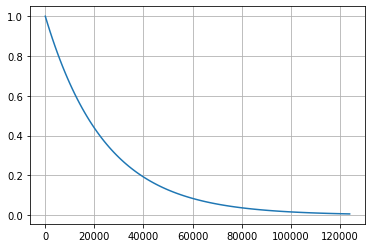

In [329]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
tt1 = tt*10**6
ax.plot(tt1,Pvals)
ax.grid()
plt.show()

In [10]:
x = sp.Symbol('x')
v = sp.integrate(x**2,(x,0,2))
oo = sp.oo

In [561]:
Tzad = 10**-2

In [572]:
def F(xx):
    return ((1/np.sqrt(2*np.pi))*sp.integrate(sp.exp(-x**2/2),(x,-oo,xx))).evalf()

In [573]:
def Tti(k):
    return sp.solve(sp.Eq(0.5*sp.log(x) -0.5*sp.log(2*np.pi*Tzad) + ((Tzad-x)**2)/(2*Tzad*x) - sp.log(k),0))

In [574]:
def TTiLa(k):
    return sp.lambdify(x, 0.5*sp.log(x) -0.5*sp.log(2*np.pi*Tzad**3) - ((Tzad-x)**2)/(2*Tzad*x) - sp.log(k),modules=['numpy'])

In [575]:
from scipy.optimize import fsolve

perev = TTiLa(1)
kor = fsolve(perev, 0.000001)
kor*10**2

array([0.13787102])

In [593]:
#aaaa = fsolve(aaaaa, 0.00001)
TTiLa_vec = np.vectorize(TTiLa)
ppp = TTiLa_vec(l)
lmbd = lambda ss: fsolve(ss, 0.000001)
lmbdv = np.vectorize(lmbd)
ddddd = lmbdv(ppp)
ddddd = ddddd*10**2
ddddd

array([0.30483352, 0.23233842, 0.21368533, 0.12911295, 0.27601748,
       0.14246473, 0.23821965, 0.11661891, 0.13718782, 0.15501341,
       0.16623438])

In [578]:
Tnew = 1/np.sqrt(np.sum(m*ddddd**-2))
Tnew

0.046847468440959855

In [579]:
def TT(t):
    return (Tnew-t)/(nu*np.sqrt(Tnew*t))

In [580]:
def PP(t):
    return F(TT(t))- np.exp(2/nu**2)*F(-(Tnew+t)/(nu*np.sqrt(Tnew*t)))

In [527]:
PP(0.02)

3.86446270387518e-12

In [587]:
PPvec = np.vectorize(PP)
ttt = np.arange(0,0.3,0.01)
PPvals = PPvec(ttt)


/var/folders/b2/yxd46zgn5rj999vr4z_vpk640000gn/T/ipykernel_35856/3935166956.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (Tnew-t)/(nu*np.sqrt(Tnew*t))


In [529]:
   # PP(1)

0

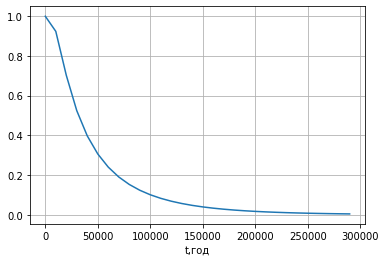

In [588]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = plt.subplot(111)
ttt1 = ttt*10**6
ax1.plot(ttt1,PPvals)
ax1.grid()
ax1.set_xlabel('t,год')
plt.show()

In [28]:
i = sp.integrate(sp.exp(-x**2/2),(x,-oo,5))
i

-(-5*sqrt(2)*pi*exp(25/2)/2 - 5*sqrt(2)*pi*exp(25/2)*erf(5*sqrt(2)/2)/2)*exp(-25/2)/(5*sqrt(pi))

In [34]:
# i.evalf()
tt = F(0).evalf()
tt

0.500000000000000

In [37]:
tt+1

1.50000000000000

In [590]:
def Tlamda():
    return sp.lambdify(x,F((x-1)/sp.sqrt(x))+np.exp(2)*F(-(x+1)/sp.sqrt(x))-1+0.9,modules=['numpy'])

In [592]:
tl = Tlamda()
tls = fsolve(tl, 0.0001)
tls

array([0.0001])